In [1]:
import numpy as np
import cv2
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [2]:
train = "cats_dogs_light/train"
test = "cats_dogs_light/test"
image_size = 128

In [3]:
def test_data():
    test_data_dogs = [] 
    test_data_cats=[]
    for image in tqdm(os.listdir(test)): 
        path = os.path.join(test, image)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img = cv2.resize(img, (image_size, image_size))
        if image.split('.')[0] == "cat":
            test_data_cats.append(img)
        else:
            test_data_dogs.append(img)
    
    X = np.concatenate((np.asarray(test_data_dogs),np.asarray(test_data_cats)),axis=0)
    X = X.reshape(X.shape[0],X.shape[1]*X.shape[2])
    y = np.vstack([np.ones([200,1]),np.zeros([200,1])])
    return (X,y)

In [4]:
def train_data():
    train_data_dogs = [] 
    train_data_cats=[]
    for image in tqdm(os.listdir(train)): 
        path = os.path.join(train, image)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img = cv2.resize(img, (image_size, image_size))
        if image.split('.')[0] == "cat":
            train_data_cats.append(img)
        else:
            train_data_dogs.append(img)
    
    train_data= np.concatenate((np.asarray(train_data_dogs),np.asarray(train_data_cats)),axis=0)
    return train_data 

In [5]:
train_data = train_data() 

100%|██████████| 1000/1000 [00:18<00:00, 54.22it/s]


In [6]:
train_data.shape

(1000, 128, 128)

In [7]:
X = train_data
y = np.vstack([np.ones([500,1]),np.zeros([500,1])])
X.shape,y.shape
y = y.ravel()
X= X.reshape(1000,X.shape[1]*X.shape[2])

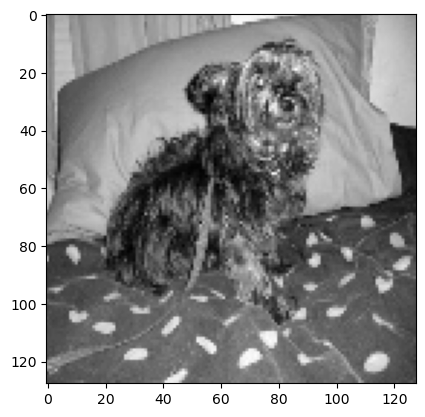

In [8]:
plt.imshow(X[0].reshape(128,128),cmap="gray")

In [17]:
model = SVC(C=10)
model.fit(X,y)

SVC(C=10)

In [18]:
X_test,y_test = test_data()

100%|██████████| 400/400 [00:03<00:00, 131.23it/s]


In [19]:
X_test.shape,y_test.shape

((400, 16384), (400, 1))

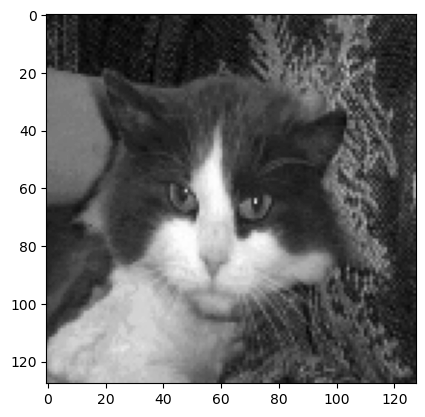

In [20]:
plt.imshow(X_test[203].reshape(128,128),cmap="gray")

This is a  cat


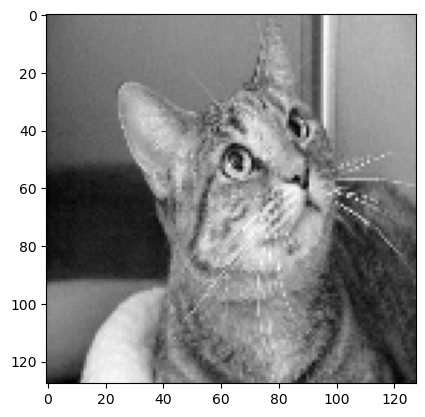

In [21]:
i = 216
plt.imshow(X_test[i].reshape(128,128),cmap="gray")
ans = "dog" if model.predict([X_test[i]]) == 1 else "cat"
print("This is a ",ans)

In [22]:
model.predict(X_test[210:220])

array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [23]:
y_test[210:220]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [24]:
model.score(X_test,y_test)

0.595